<a href="https://colab.research.google.com/github/Dish20/NativeSoft_Tech/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 88ms/step - accuracy: 0.3272 - loss: 1.8053 - val_accuracy: 0.5061 - val_loss: 1.3607
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.5436 - loss: 1.2787 - val_accuracy: 0.6012 - val_loss: 1.1288
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.6072 - loss: 1.1037 - val_accuracy: 0.6082 - val_loss: 1.1083
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - accuracy: 0.6457 - loss: 1.0092 - val_accuracy: 0.6401 - val_loss: 1.0339
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 87ms/step - accuracy: 0.6753 - loss: 0.9296 - val_accuracy: 0.6476 - val_loss: 0.9988
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.6980 - loss: 0.8651 - val_accuracy: 0.6766 - val_loss: 0.9287
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7189 - loss: 0.8023 - val_accuracy: 0.6933 - val_loss: 0.8818
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7396 - loss: 0.7516 - 

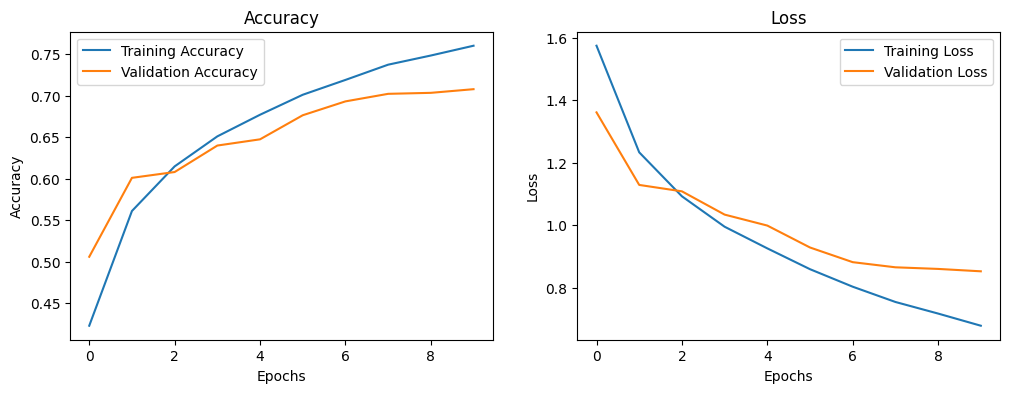

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
